In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import read_csv
import matplotlib as mpl
from cycler import cycler
from scipy.integrate import simpson
from hnc.hnc.constants import *
from hnc.hnc.misc import n_from_rs, rs_from_n, Degeneracy_Parameter, Gamma, Kappa, More_TF_Zbar


In [7]:
def Ion_Plasma_Frequency(ni, mi, Zbar):
    ωp = np.sqrt(4 * π *Zbar**2 * ni /mi)
    return ωp

626.64435*K_to_eV, 626.64435*K_to_eV### Hydrogen, $T_e = T_i$

#### TCCW H1 points

In [12]:
A, Z = 2.014, 1 #  Deuterium
A, Z = 1.00784, 1 # Hydrogen
ρ_gpercc = 1
m_AU = A*amu_to_AU
ni_cc = ρ_gpercc/(m_AU*AU_to_g)
ni_AU = ni_cc*invcc_to_AU
ne_AU = Z*ni_cc*invcc_to_AU
ri = rs_from_n(ni_AU)

Ti_eV, Te_eV  = 2, 2
Ti_AU, Te_AU = Ti_eV*eV_to_AU, Te_eV*eV_to_AU

Zbar = ThomasFermiZbar( Z, ni_AU, Ti_AU)

N_i = 100
L = (N_i/ ni_AU )**(1/3)
Γii = Gamma(Ti_AU, ni_AU, Z)
Γee = Gamma(Te_AU, ne_AU, 1)
κ = Kappa(Te_AU, ni_AU, Zbar)               # screening length
θ = Degeneracy_Parameter(Te_AU, ne_AU)
Γii, Γee, θ, L, Ti_AU*AU_to_K, Te_AU*AU_to_Ry

(9.77547208384342,
 9.77547208384342,
 0.07731318329142557,
 10.413876661597705,
 23209.050012319647,
 0.1469973015918493)

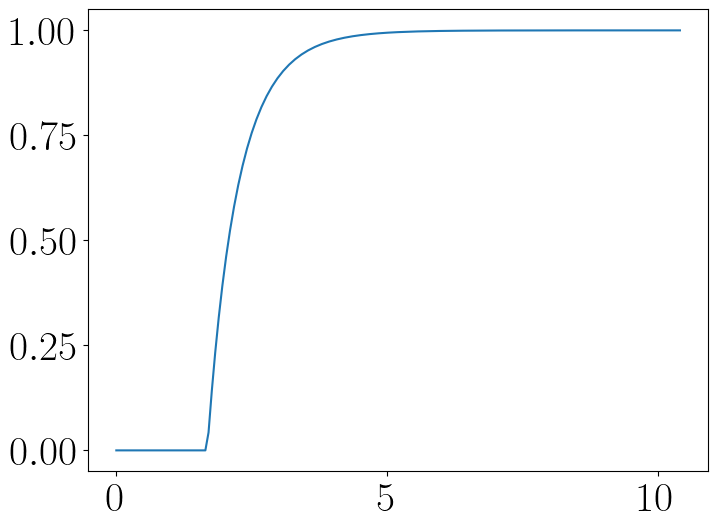

In [13]:
g_OCP_diverge = lambda rstar: 1 - Γii/(rstar+1e-8)*np.exp(-κ*rstar) #rstar=r/ri
g_OCP = lambda r: np.max([0,g_OCP_diverge(r/ri)])
g_OCP = np.vectorize(g_OCP)

fig, ax = plt.subplots(figsize=(8,6))

r_array = np.geomspace(L*1e-3,L, num=200)
g_OCP_array = g_OCP(r_array)
ax.plot(r_array, g_OCP_array)

In [14]:

ωp_AU = Ion_Plasma_Frequency(ni_AU, m_AU, ThomasFermiZbar(Z, ni_AU, Te_eV*eV_to_AU))
τp_AU = 2*π/(ωp_AU)
τp_RAU = τp_AU/2
dt_over_τp = 0.02 
N_plasma_periods = 20
print(f"In QE RAU, τp is {τp_RAU} RAU, so {dt_over_τp:0.3f} τp = {τp_RAU*dt_over_τp}")
print(f"Num steps for {N_plasma_periods} plasma periods: {N_plasma_periods/dt_over_τp}")

In QE RAU, τp is 184.34059133329654 RAU, so 0.020 τp = 3.686811826665931
Num steps for 20 plasma periods: 1000.0


### Lithium, $T_e = T_i$

In [18]:
A, Z = 6.941, 3 # Lithium
ρ_gpercc = 0.534 # solid Li density

m_AU = A*amu_to_AU
ni_cc = ρ_gpercc/(m_AU*AU_to_g)
ni_AU = ni_cc*invcc_to_AU
ne_AU = Z*ni_cc*invcc_to_AU
ri = rs_from_n(ni_AU)

Ti_eV, Te_eV  = 626.64435*K_to_eV, 626.64435*K_to_eV
Ti_AU, Te_AU = Ti_eV*eV_to_AU, Te_eV*eV_to_AU

Zbar = ThomasFermiZbar( Z, ni_AU, Ti_AU)

N_i = 100
L = (N_i/ ni_AU )**(1/3)
Γii = Gamma(Ti_AU, ni_AU, Z)
Γee = Gamma(Te_AU, ne_AU, 1)
κ = Kappa(Te_AU, ni_AU, Zbar)               # screening length
θ = Degeneracy_Parameter(Te_AU, ne_AU)
Γii, Γee, θ, L, Ti_AU*AU_to_K, Te_AU*AU_to_Ry

(1389.4835830070826,
 222.664677837907,
 0.005519028206246829,
 24.42167768636259,
 626.6443500000013,
 0.003968927140873184)

In [16]:

ωp_AU = Ion_Plasma_Frequency(ni_AU, m_AU, ThomasFermiZbar(Z, ni_AU, Te_eV*eV_to_AU))
τp_AU = 2*π/(ωp_AU)
τp_RAU = τp_AU/2
dt_over_τp = 0.02 
N_plasma_periods = 20
print(f"In QE RAU, τp is {τp_RAU} RAU, so {dt_over_τp:0.3f} τp = {τp_RAU*dt_over_τp}")
print(f"Num steps for {N_plasma_periods} plasma periods: {N_plasma_periods/dt_over_τp}")

In QE RAU, τp is 407.19616445198113 RAU, so 0.020 τp = 8.143923289039623
Num steps for 20 plasma periods: 1000.0


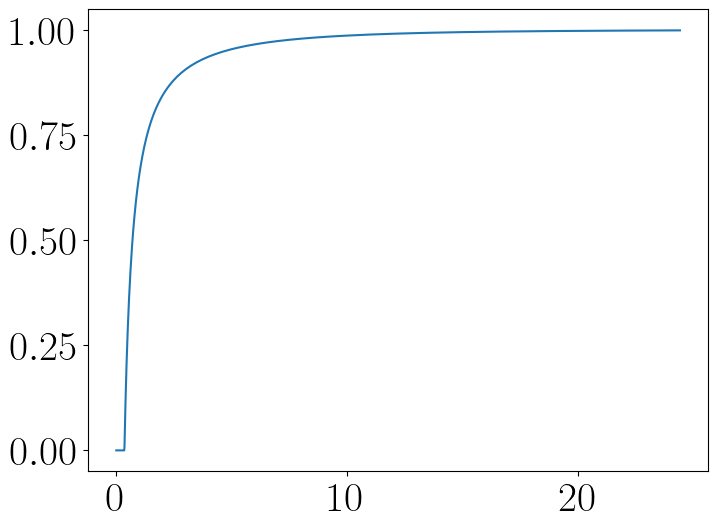

In [17]:
g_OCP_diverge = lambda rstar: 1 - Γii/(rstar+1e-8)*np.exp(-κ*rstar) #rstar=r/ri
g_OCP = lambda r: np.max([0,g_OCP_diverge(r/ri)])
g_OCP = np.vectorize(g_OCP)

fig, ax = plt.subplots(figsize=(8,6))

r_array = np.geomspace(L*1e-3,L, num=200)
g_OCP_array = g_OCP(r_array)
ax.plot(r_array, g_OCP_array)

### Aluminum, $T_e \neq T_i$

In [19]:
A, Z = 13, 26.981539 # Aluminum
ρ_gpercc = 2.699 #g/cc # solid Al density

m_AU = A*amu_to_AU
ni_cc = ρ_gpercc/(m_AU*AU_to_g)
ni_AU = ni_cc*invcc_to_AU
ne_AU = Z*ni_cc*invcc_to_AU
ri = rs_from_n(ni_AU)

Ti_eV, Te_eV  = 1, 10
Ti_AU, Te_AU = Ti_eV*eV_to_AU, Te_eV*eV_to_AU

Zbar = More_TF_Zbar( Z, ni_AU, Ti_AU)

N_i = 60
L = (N_i/ ni_AU )**(1/3)
Γii = Gamma(Ti_AU, ni_AU, Z)
Γee = Gamma(Te_AU, ne_AU, 1)
κ = Kappa(Te_AU, ni_AU, Zbar)               # screening length
θ = Degeneracy_Parameter(Te_AU, ne_AU)
print(f"Cell length: L = {L:0.5f} [au]")
Γii, Γee, θ, 
print(f"Ti[K]: {Ti_AU*AU_to_K:0.5f}")
print(f"Te[Rau]: {Te_AU*AU_to_Ry:0.5f}")

Cell length: L = 14.79491 [au]
Ti[K]: 11604.52501
Te[Rau]: 0.73499


In [22]:
ωp_AU = Ion_Plasma_Frequency(ni_AU, m_AU, More_TF_Zbar(Z, ni_AU, Te_eV*eV_to_AU))
τp_AU = 2*π/(ωp_AU)
τp_RAU = τp_AU/2
dt_over_τp = 0.02 
N_plasma_periods = 20
print(f"In QE RAU, τp is {τp_RAU} RAU, so {dt_over_τp:0.3f} τp = {τp_RAU*dt_over_τp}")
print(f"Num steps for {N_plasma_periods} plasma periods: {N_plasma_periods/dt_over_τp}")

In QE RAU, τp is 183.28001699640825 RAU, so 0.020 τp = 3.665600339928165
Num steps for 20 plasma periods: 1000.0


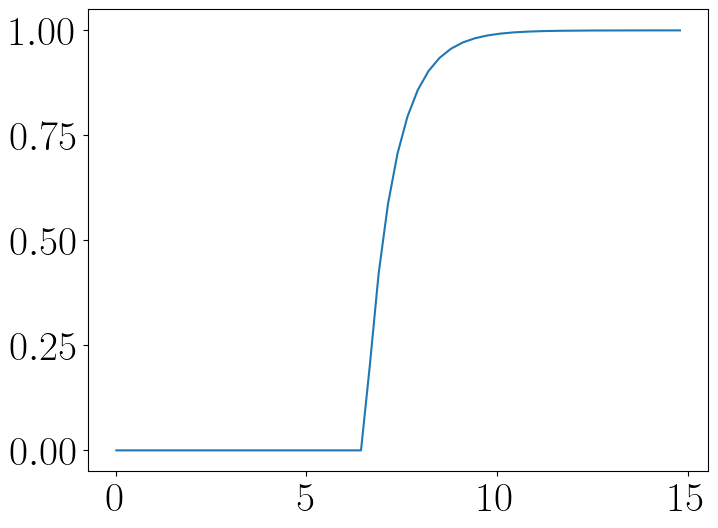

In [21]:
g_OCP_diverge = lambda rstar: 1 - Γii/(rstar+1e-8)*np.exp(-κ*rstar) #rstar=r/ri
g_OCP = lambda r: np.max([0,g_OCP_diverge(r/ri)])
g_OCP = np.vectorize(g_OCP)

fig, ax = plt.subplots(figsize=(8,6))

r_array = np.geomspace(L*1e-3,L, num=200)
g_OCP_array = g_OCP(r_array)
ax.plot(r_array, g_OCP_array)